In [1]:
# Install the environnement
%pip install git+https://github.com/AwePhD/NotebooksLabsessionImage.git

  Cloning https://github.com/AwePhD/NotebooksLabsessionImage.git to /tmp/pip-req-build-3vdf1de3
  Running command git clone -q https://github.com/AwePhD/NotebooksLabsessionImage.git /tmp/pip-req-build-3vdf1de3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for NLI: filename=NLI-1.0.0-py3-none-any.whl size=2406 sha256=1560bca79741ab76575f29d7909879ca0bdb2ee81d8ce93d940f944b7820964b
  Stored in directory: /tmp/pip-ephem-wheel-cache-c4y459bw/wheels/17/4a/a4/4f920391e876c3c2632ecc7851748e1c11539349fe2eefd2c4
Successfully built NLI


In [2]:
# Import dataset 
# Can be found at https://www.kaggle.com/vishalsubbiah/pokemon-images-and-types
!rm -rf ./*
!curl -LO https://github.com/AwePhD/NotebooksLabsessionImage/raw/main/pokemon_dataset.zip
!unzip -qq pokemon_dataset.zip
!rm pokemon_dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   156  100   156    0     0    445      0 --:--:-- --:--:-- --:--:--   444
100 2484k  100 2484k    0     0  4155k      0 --:--:-- --:--:-- --:--:-- 4155k


In [1]:
# Standard imports
from pathlib import Path
from pprint import pprint
from typing import List, Dict

# Third party imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
from skimage import img_as_float, img_as_ubyte

# Local imports
from NLI.utils import (
    iprint,
    print_img_info
)

ModuleNotFoundError: No module named 'matplotlib'

# What is an image ?

An image is a 2D data with one or more channels for each pixels: grayscale image have 1 channels, RGB images have 3 channels, hyperspectrale images might have dozen of channels.

The best way to process images is to use an existing image library. There are multiple image libraries based on the process' needs. For this notebook, the Scikit-image *aka* skimage is used. Namely, it is a bad idea to use matplotlib to read and display an image.

## Import an image

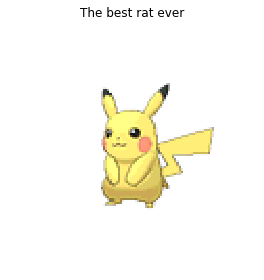

In [4]:
# Get the path to the Pikachu image and load image in img variable
path_pikachu: Path = Path.cwd() / "images" / "pikachu.png"
img = io.imread(path_pikachu)

# Display the image
# In future this code is inside the function iprint in the repo package NLI
# https://github.com/AwePhD/NotebooksLabsessionImage/blob/main/NLI/utils.py#L6
# https://github.com/AwePhD/NotebooksLabsessionImage/blob/main/NLI/utils.py#L20
# Display
plt.figure()
plt.axis("off")
plt.title("The best rat ever")
io.imshow(img)
plt.show()

##### Explore an image

Numpy use the object of `ndarray` to represents tabular data. A brief introduction of the possible is available [here](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html). Also, a [quick explanation](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html) of data types can be useful to understand what Python is storing inside the `ndarray` objects.

Eventually, `ndarray` is an object. In short, an object is a data structure - a variable that contains more or less data - with a specific behaviour. 

For instance, an `ndarray` for an image would contain all the data about the image - the value of each pixel. Plus we will be able to do some operation on this image easily without writing much code : stat informations, image informations, basic arithmetics ...

In [5]:
# Base image
print(
    f"type(img): {type(img)}\n"
    f"img.shape: {img.shape}\n"
    f"img.dtype: {img.dtype}\n"
    f"Range: {img.min()}-{img.max()}\n"
)
# To float
img_float = img_as_float(img)
print_img_info(img_float)

# To uint8 (unsigned byte)
img_ubyte = img_as_ubyte(img)
print_img_info(img_ubyte)

# Note that the base image was already on 8 bits (1 Byte) unsigned.

type(img): <class 'numpy.ndarray'>
img.shape: (120, 120, 4)
img.dtype: uint8
Range: 0-255

img.shape: (120, 120, 4)
img.dtype: float64
Range of value: 0.0-1.0

img.shape: (120, 120, 4)
img.dtype: uint8
Range of value: 0-255



## Use of numpy witn ndarray for Image processing

Numpy array - `ndarray` - is the most used data structure in Numpy package. This array has a ton of features which often are used in data processing.

##### "Smart artihmetic" operation on ndarray

The _smart_ arithmetic is known as broadcasting. There [is a section](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) of the Python Data Handbook which is about this feature. Mainly, we can use `ndarray` easily and handily. 

In [6]:
# Numpy is smart
# Increment all value by a scalar
data: np.ndarray = np.random.randn(50,50,300)
data_plus_one: np.ndarray = data + 1
print(
    f"data[25,30,120]: {data[25,30,120]:.2f}\n"
    f"data_plus_one[25,30,120]: {data_plus_one[25,30,120]:.2f}\n"
)

# Increment all values by a vector
# All element with the same last indice get the same increment
data_plus_vector: np.ndarray = data + np.arange(300)
print(
    f"np.arange(300)[120]: {np.arange(300)[120]}\n"
    f"{'':-^50}\n"
    f"data[25,30,120]: {data[25,30,120]:.2f}\n"
    f"data_plus_vector[25,30,120]: {data_plus_vector[25,30,120]:.2f}\n"
    f"{'':-^50}\n"
    f"data[24,0,120]: {data[24,0,120]:.2f}\n"
    f"data_plus_vector[24,0,120]: {data_plus_vector[24,0,120]:.2f}\n"
    f"{'':-^50}\n"
    f"data[25,30,121]: {data[25,30,121]:.2f}\n"
    f"data_plus_vector[25,30,121]: {data_plus_vector[25,30,121]:.2f}\n"
)
# See that coefficient with last slice 120 got incremented by 120 and a
# different coefficient with last slice 121 got incremented by 121.
# Numpy smartly increments data

data[25,30,120]: 0.41
data_plus_one[25,30,120]: 1.41

np.arange(300)[120]: 120
--------------------------------------------------
data[25,30,120]: 0.41
data_plus_vector[25,30,120]: 120.41
--------------------------------------------------
data[24,0,120]: -0.60
data_plus_vector[24,0,120]: 119.40
--------------------------------------------------
data[25,30,121]: 0.35
data_plus_vector[25,30,121]: 121.35



##### Mean processing

We can process the mean easily. Here a brief section to illustrate how to do it. For more details, check the [section](https://jakevdp.github.io/PythonDataScienceHandbook/02.04-computation-on-arrays-aggregates.html) of Python Datascience Handbook which shows other functions.

In [7]:
# Process mean

# Let's have a 2D array with 50 elements of 100 length
# A 2D matrix represents 50 vectors having 100 coordinates.
ar: np.ndarray = np.random.randn(50,100)

# We would like to have the mean value of the array
# Namely the mean value given any vector and any coordinate
print(f"ar.mean(): {ar.mean():.3f}\n")

# We would like to have the mean value for each coordinate
# That's the mean along the first axis, the axis of vector
# The mean of first coordinate is the mean of all first coordinates for all
# vectors.
# ar[:,0] is the first coordinate for all vector
mean_coord: np.ndarray = ar.mean(0)
print(f"ar.mean(0).shape: {mean_coord.shape}\n")

# We would like to have the mean value for each vector
# That's the mean along the second exis, the axis of coordinates
# The mean of first vector is the mean of its coordinates 
# ar[0,:] (or ar[0]) is the first vector
mean_vector: np.ndarray = ar.mean(1)
print(f"ar.mean(1).shape: {mean_vector.shape}\n")

ar.mean(): 0.008

ar.mean(0).shape: (100,)

ar.mean(0).shape: (50,)



### Compute the RGB mean of an image on list comprehension
How to get data from files and path is explained in the Path collab.

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AwePhD/NotebooksLabsessionImage/blob/main/notebooks/manage_path.ipynb)

#### List comprehension

A list comprehension is faster than a regular loop ([SO reply](https://stackoverflow.com/a/22108640)) and more natural than a loop structure - once we are used to it! List comprehension are **only** meant to build a list from another object.

Here we are going to illustrate a list comprehension. We have a list of names $\{\text{Alice, Adam, Bob, Bertrand, Céline}\}$. The point is to retrieve each noun beginning by an $\text{A}$.

In [5]:
# Let's have a list of name
name_list: List[str] = ["Alice", "adam", "Bob", "Bertrand", "céline"]
print(f"name_list: {name_list}\n")

# We want to build the list of names with 'A' as first letter
# The classical approach is
A_name_list: List[str] = []
for name in name_list:
  if name[0] == 'A':
    A_name_list.append(name)
print(f"{' No list comprehension ':-^50}\n")
print(f"A_name_list: {A_name_list}\n")

name_list: ['Alice', 'Adam', 'Bob', 'Bertrand', 'Céline']

------------- No list comprehension --------------

A_name_list: ['Alice', 'Adam']



Now, we are going to write the list comprehension in a one liner*. The **main** idea of a list comprehension is to generate _right away_ the final list: the list of the names beginning with an $\text{A}$.

Here, we basically take each name in the original tab with `for name in name_list` then we added a guard `if name[0] == 'A'` in order to filter which name we are keeping. 

*: we expanded the expression on several lines for readibility. It could have been done in one line if we remove the new line characters.

In [4]:
# The list comprenhension approach is
A_name_list_c: List[str] = [
  name
  for name in name_list
  if name[0] == 'A'
]
print(f"{' List comprehension ':-^50}\n")
print(f"A_name_list: {A_name_list_c}\n")

--------------- List comprehension ---------------

A_name_list: ['Alice', 'Adam']



We do not have to use the `if` guard for the list comprehension. Let's consider we want to generate the same list of names with names in title, namely these names should have the first letter capitalized.

In [6]:
# The list comprenhension approach is
A_name_list_c: List[str] = [
  name.title()
  for name in name_list
]
print(f"{' List comprehension ':-^50}\n")
print(f"A_name_list: {A_name_list_c}\n")

--------------- List comprehension ---------------

A_name_list: ['Alice', 'Adam', 'Bob', 'Bertrand', 'Céline']



##### Computing RGB mean of pictures on list comprehension

Here, we want to use the new shiny list comprehension to do some image processing. For this, we have `path_images_dir` which is the directory of containing all the images. In a single line of code we can iter into this directory and compute the mean with a friendly syntax.

In [2]:
path_images_dir: Path = Path.cwd() / "images"
mean_list: List[np.ndarray] = [
  img_as_float(
      io.imread(path_file)
  ).mean((0,1))
  for path_file in path_images_dir.iterdir()
]

# Print few elements
print(
    f"{'3 first elements of the list of means':^40}"
)
pprint(mean_list[:3])

NameError: name 'img_as_float' is not defined

Note, the mean vectors are lame and not very representative in this case. A lot of pixel are taken in consideration while their pixel have are white or / and transparent The solution would be to compute the mean from a masked image version. 

#### Dictionnary comprehension

Another common data structure in Python is the dictionnary. This is a mapping between a _simple_ element - hashable - and another data structure. For example, dictionnary have keys (the simple element) with the name of the picture and has as value the mean vector of the picture.

__Tips__: List can be seen as special dictionnary where keys are indexes. With dictionnary, we do not need to have indexes, the keys are the index.

In [12]:
mean_d: Dict[str, np.ndarray] = {
  path_file.name: img_as_float(
      io.imread(path_file)
  ).mean((0,1))
  for path_file in path_images_dir.iterdir()
}

# Print few elements
print(
    f"{'3 first elements of the list of means':^40}"
)
pprint(mean_list[:3])


{'Adam': 8, 'Alice': 20, 'Bertrand': 20, 'Bob': 6, 'Céline': 15, 'Sarah': 19}
grad_dict['Céline']: 15

---------------------------- No dict comprehension -----------------------------

better_than_average: {'Alice': 20, 'Bertrand': 20, 'Céline': 15, 'Sarah': 19}

------------------------------ Dict comprehension ------------------------------

better_than_average_c: {'Alice': 20, 'Bertrand': 20, 'Céline': 15, 'Sarah': 19}



Plus, you can even map the `Path` object of your file to the mean, `Path` objects are hashable.

In [11]:
# Dictionnary is a special variable that as a "key" to index the "values"
# An array, a tuple, a list have an integer to index each value for example.
path_images_dir: Path = Path.cwd() / "images"
mean_dict: Dict[Path, np.ndarray] = {
  path_file: img_as_float(
      io.imread(path_file)
  ).mean((0,1))
  for path_file in path_images_dir.iterdir()
}

# Print few elements
print(
    f"||{'3 first elements of the list of means':^55}||"
)
pprint(list(mean_dict.items())[:3])

# Mapping the path of a picture and its mean might be convenient for future
# uses ...

||         3 first elements of the list of means         ||
[(PosixPath('/content/images/octillery.png'),
  array([0.11370833, 0.05174619, 0.0409055 , 0.12972685])),
 (PosixPath('/content/images/nincada.png'),
  array([0.04815142, 0.0482658 , 0.04826498, 0.06252315])),
 (PosixPath('/content/images/terrakion.png'),
  array([0.20425218, 0.18477397, 0.16943927, 0.32776389]))]
